<a href="https://colab.research.google.com/github/MasayukiMotoori/SEGJ_2025/blob/main/Debye_linear_Combination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
eps = np.finfo(float).eps
print(eps)

2.220446049250313e-16


In [ ]:
freq = np.r_[np.logspace(-1,5,31)]
m= len(freq)
print(m,freq)

31 [1.00000000e-01 1.58489319e-01 2.51188643e-01 3.98107171e-01
 6.30957344e-01 1.00000000e+00 1.58489319e+00 2.51188643e+00
 3.98107171e+00 6.30957344e+00 1.00000000e+01 1.58489319e+01
 2.51188643e+01 3.98107171e+01 6.30957344e+01 1.00000000e+02
 1.58489319e+02 2.51188643e+02 3.98107171e+02 6.30957344e+02
 1.00000000e+03 1.58489319e+03 2.51188643e+03 3.98107171e+03
 6.30957344e+03 1.00000000e+04 1.58489319e+04 2.51188643e+04
 3.98107171e+04 6.30957344e+04 1.00000000e+05]


In [ ]:
c=0.3
tau= 1e2
tau1,c1, tau2, c2= 1e2, 0.3, 1e-6, 0.3

In [ ]:

def pelton(freq,tau,c):
  iwtc = 0 + (1.j * 2.* np.pi * freq *tau)** c
  return 1./(1+iwtc)
def pelton_dual(freq,tau1,c1,tau2,c2):
  iwtc1 = 0 + (1.j * 2.* np.pi * freq *tau1)** c1
  iwtc2 = 0 + (1.j * 2.* np.pi * freq * tau2)** c2
  return 1./(1+iwtc1)/(1.+iwtc2)

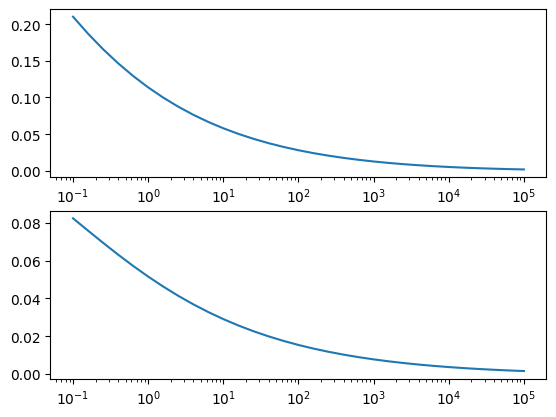

In [ ]:

fig ,ax = plt.subplots(2,1)
#f = pelton(freq,tau,c)
f = pelton_dual(freq,tau1,c1, tau2,c2)
ax[0].semilogx(freq,f.real )
ax[1].semilogx(freq,-f.imag)

In [ ]:

f_real = f.real
f_imag = f.imag

d= np.r_[f_real,f_imag]
print(d)

[ 0.21009808  0.18693344  0.16579898  0.14662721  0.12932478  0.11378033
  0.0998714   0.08747015  0.07644791  0.06667857  0.05804112  0.05042131
  0.04371267  0.03781706  0.03264482  0.0281146   0.0241531   0.02069456
  0.01768027  0.01505798  0.01278129  0.01080912  0.0091051   0.00763707
  0.00637656  0.00529833  0.00437995  0.00360148  0.00294506  0.00239475
  0.00193621 -0.08234319 -0.0758184  -0.06938491 -0.06314447 -0.05717567
 -0.05153538 -0.04626102 -0.04137341 -0.03687968 -0.03277619 -0.02905113
 -0.02568684 -0.02266176 -0.01995197 -0.01753245 -0.01537805 -0.01346418
 -0.0117673  -0.01026524 -0.00893746 -0.00776509 -0.00673099 -0.00581976
 -0.00501761 -0.00431231 -0.00369305 -0.00315032 -0.00267578 -0.00226207
 -0.00190267 -0.0015918 ]


In [ ]:
#taus =np.logspace(-5,1,11)
taus =np.logspace(-8,4,61)
# taus =np.logspace(-11,7,91)
n = len(taus)
print(n,taus)


61 [1.00000000e-08 1.58489319e-08 2.51188643e-08 3.98107171e-08
 6.30957344e-08 1.00000000e-07 1.58489319e-07 2.51188643e-07
 3.98107171e-07 6.30957344e-07 1.00000000e-06 1.58489319e-06
 2.51188643e-06 3.98107171e-06 6.30957344e-06 1.00000000e-05
 1.58489319e-05 2.51188643e-05 3.98107171e-05 6.30957344e-05
 1.00000000e-04 1.58489319e-04 2.51188643e-04 3.98107171e-04
 6.30957344e-04 1.00000000e-03 1.58489319e-03 2.51188643e-03
 3.98107171e-03 6.30957344e-03 1.00000000e-02 1.58489319e-02
 2.51188643e-02 3.98107171e-02 6.30957344e-02 1.00000000e-01
 1.58489319e-01 2.51188643e-01 3.98107171e-01 6.30957344e-01
 1.00000000e+00 1.58489319e+00 2.51188643e+00 3.98107171e+00
 6.30957344e+00 1.00000000e+01 1.58489319e+01 2.51188643e+01
 3.98107171e+01 6.30957344e+01 1.00000000e+02 1.58489319e+02
 2.51188643e+02 3.98107171e+02 6.30957344e+02 1.00000000e+03
 1.58489319e+03 2.51188643e+03 3.98107171e+03 6.30957344e+03
 1.00000000e+04]


In [ ]:
A=np.zeros((2*m,n))
for i in range(m):
  iwt = 0 + (1.j * 2. * np.pi * freq[i] * taus)
  A[i,:]= (1/(1+iwt)).real
  A[m+i,:] = (1/(1+iwt)).imag


In [ ]:
# A=np.zeros((2*m,n))
# for i in range(m):
#   iwt = 0 + (1.j * 2. * np.pi * freq[i] * taus)**(0.5)
#   A[i,:]= (1/(1+iwt)).real
#   A[m+i,:] = (1/(1+iwt)).imag
# #print(A)

0.587040886668236


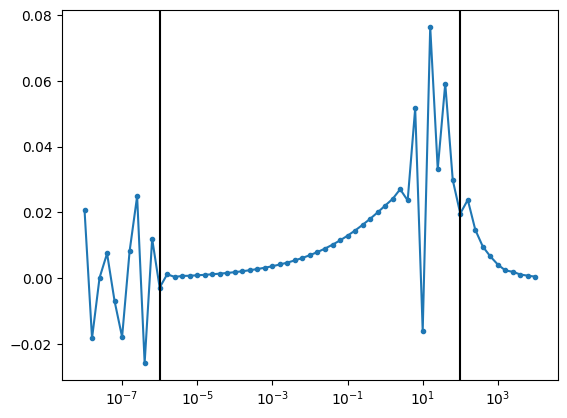

In [ ]:
beta =eps # 100000*eps #0.0000000001
a =  np.linalg.solve(A.T@A + beta*np.eye(n), A.T@d)

print(a.sum())
plt.semilogx(taus,a,".-")
# plt.axvline(tau,color="k")
plt.axvline(tau1,color="k")

plt.axvline(tau2,color="k")

In [ ]:
dpred = A@a
dpred_real = dpred[:m]
dpred_imag = dpred[m:]
print(dpred)

[ 0.21009808  0.18693344  0.16579898  0.14662721  0.12932478  0.11378033
  0.0998714   0.08747015  0.07644791  0.06667857  0.05804112  0.05042131
  0.04371267  0.03781707  0.03264482  0.0281146   0.0241531   0.02069456
  0.01768027  0.01505798  0.01278129  0.01080912  0.0091051   0.00763707
  0.00637656  0.00529833  0.00437995  0.00360148  0.00294506  0.00239475
  0.00193621 -0.08234319 -0.0758184  -0.06938491 -0.06314447 -0.05717567
 -0.05153538 -0.04626102 -0.04137341 -0.03687968 -0.03277619 -0.02905113
 -0.02568684 -0.02266176 -0.01995197 -0.01753245 -0.01537805 -0.01346418
 -0.0117673  -0.01026524 -0.00893746 -0.00776509 -0.00673099 -0.00581976
 -0.00501761 -0.0043123  -0.00369305 -0.00315032 -0.00267578 -0.00226207
 -0.00190267 -0.0015918 ]


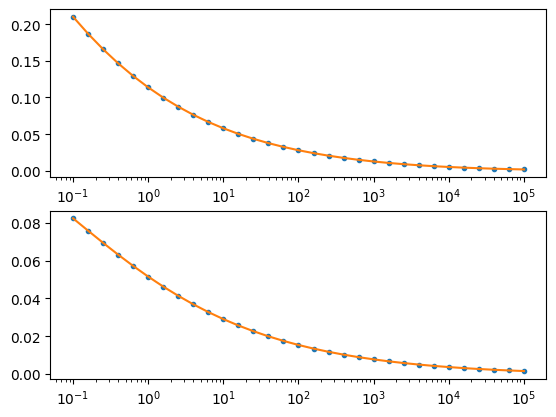

In [ ]:

fig ,ax = plt.subplots(2,1)
ax[0].semilogx(freq,f_real,"." )
ax[0].semilogx(freq,dpred_real )
ax[1].semilogx(freq,-f_imag, ".")
ax[1].semilogx(freq,-dpred_imag )


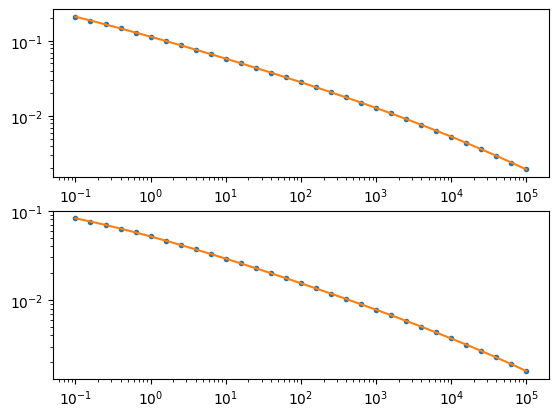

In [ ]:
fig ,ax = plt.subplots(2,1)
ax[0].loglog(freq,f_real,"." )
ax[0].loglog(freq,dpred_real )
ax[1].loglog(freq,-f_imag, ".")
ax[1].loglog(freq,-dpred_imag )
